In [1]:
%pip install ace

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

# Create a DataFrame with the provided data
data = {
    "Year": [
        2011,
        2012,
        2013,
        2014,
        2015,
        2016,
        2017,
        2018,
        2019,
        2020,
        2021,
        2022,
        2023,
        2024,
    ],
    "Median_House_Price": [
        340000,
        370000,
        350000,
        420000,
        425000,
        500000,
        520000,
        550000,
        596000,
        610000,
        660000,
        720000,
        73000,
        760000,
    ],
    "Westpac_Forecast": [56, 53, None, 13, 33, -5, 45, 34, 34, 20, -20, 15, "I5", -10],
    "Joe_Bloggs_Forecast": [23, "34$", 19, 42, 23, 15, 1500, 18, 19, 23, 13, 8, 7, -2],
    "Harry_Spent_Forecast": [
        -20,
        -80,
        -70,
        -80,
        -50,
        -90,
        -30,
        None,
        -110,
        -90,
        -60,
        -69,
        -80,
        -80,
    ],
}


In [13]:
# first we need to clean the data

# Cleaning up the data (removing the "$" and fixing incorrect entries)
data["Westpac_Forecast"] = [56, 53, None, 13, 33, -5, 45, 34, 34, 20, -20, 15, 15, -10]
#  1500 should be a error?
data["Joe_Bloggs_Forecast"] = [23, 34, 19, 42, 23, 15, 15, 18, 19, 23, 13, 8, 7, -2]
# price down 110% is a error? and house price should increase?
data["Harry_Spent_Forecast"] = [-i if i is not None else None for i in data["Harry_Spent_Forecast"]]
# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

In [14]:
df

,Year,Median_House_Price,Westpac_Forecast,Joe_Bloggs_Forecast,Harry_Spent_Forecast
0,2011,340000,56.0,23,20.0
1,2012,370000,53.0,34,80.0
2,2013,350000,NaN,19,70.0
3,2014,420000,13.0,42,80.0
4,2015,425000,33.0,23,50.0
5,2016,500000,-5.0,15,90.0
6,2017,520000,45.0,15,30.0
7,2018,550000,34.0,18,NaN
8,2019,596000,34.0,19,110.0
9,2020,610000,20.0,23,90.0


In [18]:
df_cleaned = df

# First, calculate the mean and variance for each forecast and for the actual median house price changes
df_cleaned["Actual_Change"] = df_cleaned["Median_House_Price"].pct_change() * 100

# Calculate mean and variance for the actual changes
actual_mean = df_cleaned["Actual_Change"].mean()
actual_variance = df_cleaned["Actual_Change"].var()

# Calculate mean and variance for each forecast
westpac_mean = df_cleaned["Westpac_Forecast"].mean()
westpac_variance = df_cleaned["Westpac_Forecast"].var()

joe_bloggs_mean = df_cleaned["Joe_Bloggs_Forecast"].mean()
joe_bloggs_variance = df_cleaned["Joe_Bloggs_Forecast"].var()

harry_spent_mean = df_cleaned["Harry_Spent_Forecast"].mean()
harry_spent_variance = df_cleaned["Harry_Spent_Forecast"].var()

# Calculate the differences in mean and variance compared to the actual changes
mean_diff_westpac = abs(actual_mean - westpac_mean)
var_diff_westpac = abs(actual_variance - westpac_variance)

mean_diff_joe_bloggs = abs(actual_mean - joe_bloggs_mean)
var_diff_joe_bloggs = abs(actual_variance - joe_bloggs_variance)

mean_diff_harry_spent = abs(actual_mean - harry_spent_mean)
var_diff_harry_spent = abs(actual_variance - harry_spent_variance)

# Display the results
results = {
    "Forecast": ["Actual", "Westpac", "Joe Bloggs", "Harry Spent"],
    "Mean": [actual_mean, westpac_mean, joe_bloggs_mean, harry_spent_mean],
    "Variance": [
        actual_variance,
        westpac_variance,
        joe_bloggs_variance,
        harry_spent_variance,
    ],
    "Mean Difference": [
        0,
        mean_diff_westpac,
        mean_diff_joe_bloggs,
        mean_diff_harry_spent,
    ],
    "Variance Difference": [
        0,
        var_diff_westpac,
        var_diff_joe_bloggs,
        var_diff_harry_spent,
    ],
}

df_results = pd.DataFrame(results)

# Display the resulting comparison
df_results

,Forecast,Mean,Variance,Mean Difference,Variance Difference
0,Actual,71.635379,69009.985682,0.000000,0.000000
1,Westpac,21.769231,562.858974,49.866148,68447.126708
2,Joe Bloggs,18.357143,120.862637,53.278236,68889.123045
3,Harry Spent,69.923077,616.743590,1.712302,68393.242092


In [20]:
%pip install matplotlib

     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     -------------------------------------- 165.9/165.9 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 20.9 MB/s eta 0:00:01
   --------------- ------------------------ 3.0/7.8 MB 31.5 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.8 MB 31.7 MB/s eta 0:00:01
   ------------------------- -------------- 4.9/7.8 MB 26.1 MB/s eta 0:00:01
   ---------------------------------------  7.8/7.8 MB 33.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 31.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/217.2 kB ? eta -:--:--
   ---------------------------------------- 217.2/217.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 70.8 MB/s eta 0:00:00
   -----------------------

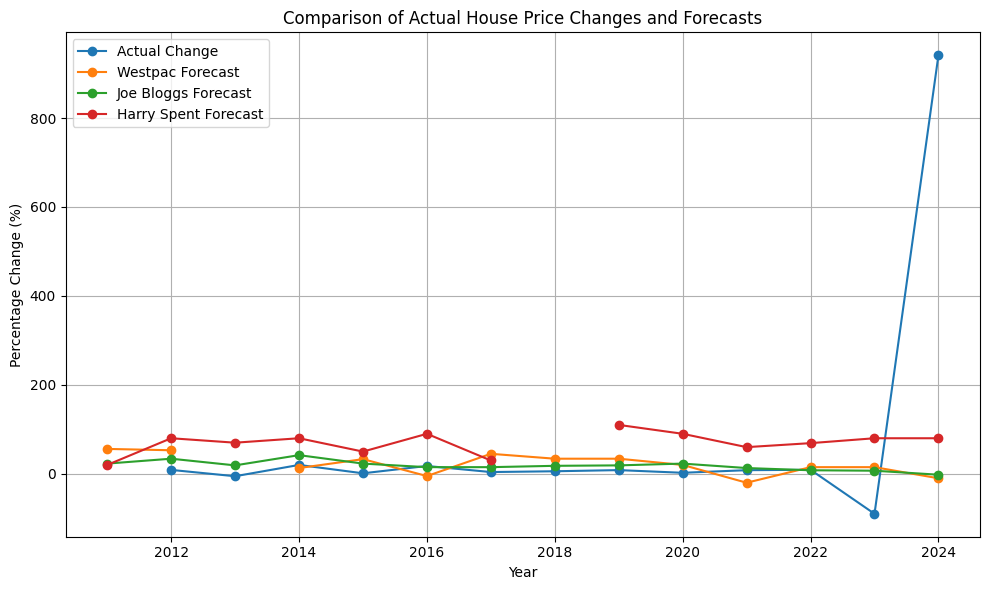

In [27]:
import matplotlib.pyplot as plt

# Prepare data for plotting
years = df_cleaned["Year"]
actual_change = df_cleaned["Actual_Change"]
westpac_forecast = df_cleaned["Westpac_Forecast"]
joe_bloggs_forecast = df_cleaned["Joe_Bloggs_Forecast"]
harry_spent_forecast = df_cleaned["Harry_Spent_Forecast"]

# Plot the actual changes and the forecasts
plt.figure(figsize=(10, 6))

plt.plot(years, actual_change, label="Actual Change", marker="o")
plt.plot(years, westpac_forecast, label="Westpac Forecast", marker="o")
plt.plot(years, joe_bloggs_forecast, label="Joe Bloggs Forecast", marker="o")
plt.plot(years, harry_spent_forecast, label="Harry Spent Forecast", marker="o")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.title("Comparison of Actual House Price Changes and Forecasts")
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

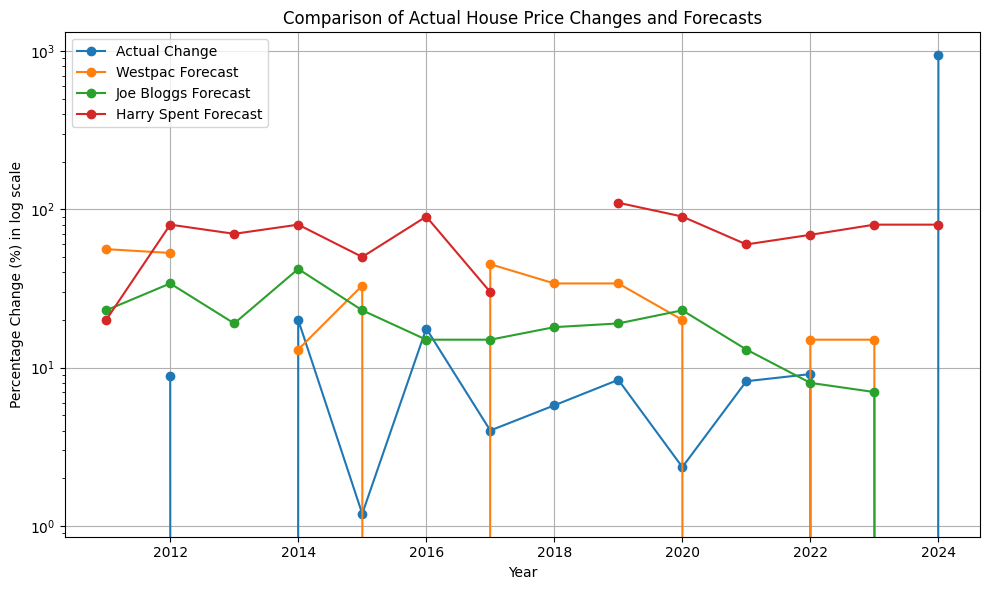

In [29]:
import matplotlib.pyplot as plt

# Prepare data for plotting
years = df_cleaned["Year"]
actual_change = df_cleaned["Actual_Change"]
westpac_forecast = df_cleaned["Westpac_Forecast"]
joe_bloggs_forecast = df_cleaned["Joe_Bloggs_Forecast"]
harry_spent_forecast = df_cleaned["Harry_Spent_Forecast"]

# Plot the actual changes and the forecasts
plt.figure(figsize=(10, 6))

plt.plot(years, actual_change, label="Actual Change", marker="o")
plt.plot(years, westpac_forecast, label="Westpac Forecast", marker="o")
plt.plot(years, joe_bloggs_forecast, label="Joe Bloggs Forecast", marker="o")
plt.plot(years, harry_spent_forecast, label="Harry Spent Forecast", marker="o")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Percentage Change (%) in log scale")
plt.title("Comparison of Actual House Price Changes and Forecasts")
plt.legend()

plt.yscale("log")

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()